In [1]:
# Dependencies
import matplotlib.pyplot as plt
import requests
from scipy import stats
import pandas as pd
from config import api_key

In [2]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

In [3]:
# List of cities
cities = ["Paris", "London", "Oslo", "Beijing", "Mumbai", "Manila", "New York", "Seattle", "Dallas", "Taipei"]

# set up lists to hold reponse info
lat = []
temp = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    lat.append(response['coord']['lat'])
    temp.append(response['main']['temp'])

print(f"The latitude information received is: {lat}")
print(f"The temperature information received is: {temp}")

The latitude information received is: [48.8534, 51.5085, 59.9127, 39.9075, 19.0144, 14.6042, 40.7143, 47.6062, 32.7668, 25.0478]
The temperature information received is: [19.51, 17.8, 17.52, 35.94, 29.99, 27.83, 25.52, 16.13, 27.88, 33.55]


In [4]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "city": cities,
    "lat": lat,
    "temp": temp
}
weather_data = pd.DataFrame(weather_dict)
weather_data

,city,lat,temp
0,Paris,48.8534,19.51
1,London,51.5085,17.80
2,Oslo,59.9127,17.52
3,Beijing,39.9075,35.94
4,Mumbai,19.0144,29.99
5,Manila,14.6042,27.83
6,New York,40.7143,25.52
7,Seattle,47.6062,16.13
8,Dallas,32.7668,27.88
9,Taipei,25.0478,33.55


<Axes: xlabel='lat', ylabel='temp'>

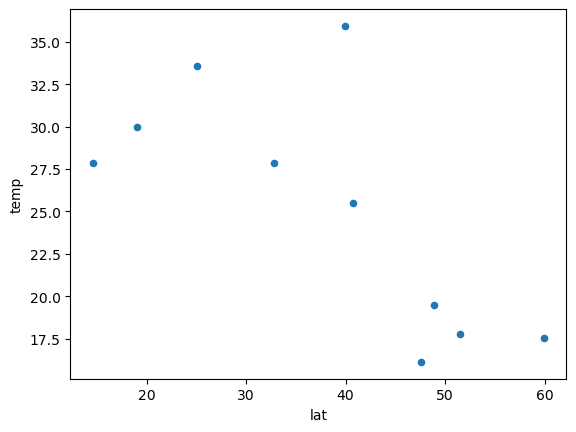

In [5]:
# Create a Scatter Plot for temperature vs latitude
weather_data.plot.scatter('lat', 'temp')

In [6]:
# Perform a linear regression on temperature vs. latitude
lr = stats.linregress(weather_data['lat'], weather_data['temp'])

# Get regression values
print(weather_data['temp'])

0    19.51
1    17.80
2    17.52
3    35.94
4    29.99
5    27.83
6    25.52
7    16.13
8    27.88
9    33.55
Name: temp, dtype: float64


In [7]:
# Create line equation string
string = f'y = {lr[0]:.2f}x +{lr[1]:.2f}'
print(string)
y = lr[0] * weather_data['lat'] + lr[1]
print(y)

y = -0.34x +37.99
0    21.502228
1    20.606234
2    17.770139
3    24.521125
4    31.571744
5    33.060018
6    24.248861
7    21.923110
8    26.930838
9    29.535704
Name: lat, dtype: float64


The r-value is: -0.7085970207924991


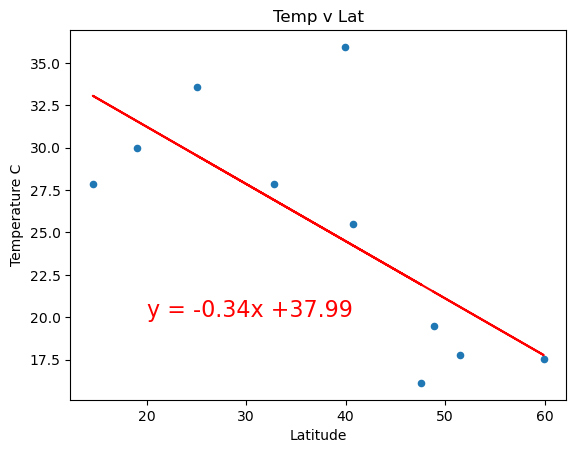

In [8]:
# Create Plot
ax = weather_data.plot.scatter('lat', 'temp').set(title='Temp v Lat', xlabel='Latitude', ylabel='Temperature C')
plt.plot(weather_data['lat'], y, color='r')

# Label plot and annotate the line equation
plt.annotate(string, xy=(20, 20), color='red', fontsize=16)

# Print r value
print(f'The r-value is: {lr[2]}')

# Show plot
plt.show()

In [9]:
# Calculate the temperature for Florence at 43.77 degrees
ta_da = lr[0] * 43.77 + lr[1]
print(f'The predicted temperature of Florence is {ta_da}')

The predicted temperature of Florence is 23.217680079642676


In [10]:
# Use API to determine actual temperature
_ = requests.get(query_url + 'Florence')
x = _.json()
print(f"The actual temperature of Florence is {x['main']['temp']}")

The actual temperature of Florence is 31.71
